## 网络上拓扑重要的节点在性状相关组织中也显著表达
### 1. 核心基因——>网络中的最大连通分支 【子图】——>单细胞数据中出现的节点
* 衡量每个节点的重要性

### 2. 核心基因在性状相关组织中是否显著高表达

In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import networkx as nx
import matplotlib.pyplot as plt
import os

In [7]:
# 读取TS FACS单细胞数据
annData = sc.read_h5ad(r"E:\00_CeSOP\data\TS_FACS\TS_Liver.h5ad")
sc_gene = list(annData.var.index)

In [12]:
df = annData.to_df()
df.head()

DDX11L1  WASH7P  MIR6859-1  \
cell_id                                                              
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1      0.0     0.0        0.0   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1      0.0     0.0        0.0   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1      0.0     0.0        0.0   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1      0.0     0.0        0.0   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1      0.0     0.0        0.0   

                                        MIR1302-2HG  MIR1302-2  FAM138A  \
cell_id                                                                   
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1          0.0        0.0      0.0   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1          0.0        0.0      0.0   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1          0.0        0.0      0.0   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1          0.0        0.0      0.0   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1          0.0        0.0      0.0   

                                        OR4G4P  OR4G11P  OR4F5  AL627309.1  \
cell_id                                                                      
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1     0.0      0.0    0.0         0.0   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1     0.0      0.0    0.0         0.0   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1     0.0      0.0    0.0         0.0   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1     0.0      0.0    0.0         0.0   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1     0.0      0.0    0.0         0.0   

                                        ...    MT-ND4  MT-TH  MT-TS2  MT-TL2  \
cell_id                                 ...                                    
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1  ...  4.514050    0.0     0.0     0.0   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1  ...  4.493524    0.0     0.0     0.0   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1  ...  4.611789    0.0     0.0     0.0   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1  ...  4.344065    0.0     0.0     0.0   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1  ...  4.443695    0.0     0.0     0.0   

                                          MT-ND5    MT-ND6  MT-TE    MT-CYB  \
cell_id                                                                       
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1  3.066113  1.735281    0.0  4.651200   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1  3.011087  0.000000    0.0  4.890568   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1  3.832069  1.114132    0.0  4.693941   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1  2.975372  0.000000    0.0  4.572667   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1  3.143889  0.000000    0.0  4.533354   

                                        MT-TT  MT-TP  
cell_id                                               
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1    0.0    0.0  
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1    0.0    0.0  
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1    0.0    0.0  
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1    0.0    0.0  
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1    0.0    0.0  

[5 rows x 58870 columns]

In [14]:
annData.var

gene_symbol     feature_type          ensemblid  highly_variable  \
DDX11L1          DDX11L1  Gene Expression  ENSG00000223972.5            False   
WASH7P            WASH7P  Gene Expression  ENSG00000227232.5            False   
MIR6859-1      MIR6859-1  Gene Expression  ENSG00000278267.1            False   
MIR1302-2HG  MIR1302-2HG  Gene Expression  ENSG00000243485.5            False   
MIR1302-2      MIR1302-2  Gene Expression  ENSG00000284332.1            False   
...                  ...              ...                ...              ...   
MT-ND6            MT-ND6  Gene Expression  ENSG00000198695.2            False   
MT-TE              MT-TE  Gene Expression  ENSG00000210194.1            False   
MT-CYB            MT-CYB  Gene Expression  ENSG00000198727.2            False   
MT-TT              MT-TT  Gene Expression  ENSG00000210195.2            False   
MT-TP              MT-TP  Gene Expression  ENSG00000210196.2             True   

                    means  dispersions  dispersions_norm      mean       std  
DDX11L1      6.398244e-05     0.835044         -0.573947  0.000039  0.005574  
WASH7P       2.274395e-03     2.442280          0.533203  0.001080  0.031731  
MIR6859-1    6.175251e-05     1.295335         -0.256874  0.000033  0.005634  
MIR1302-2HG  1.372886e-04     2.656352          0.680668  0.000048  0.008041  
MIR1302-2    1.000000e-12          NaN          0.000000  0.000000  1.000000  
...                   ...          ...               ...       ...       ...  
MT-ND6       9.634841e-01     2.466404          0.154140  0.590065  0.741395  
MT-TE        1.600667e-01     1.603787         -0.044396  0.083929  0.301820  
MT-CYB       4.367693e+00     4.765751         -0.499747  3.874830  1.104192  
MT-TT        6.573967e-02     0.624316         -0.719108  0.040580  0.186848  
MT-TP        4.385102e-01     2.705558          1.115482  0.204806  0.501265  

[58870 rows x 9 columns]

In [ ]:
'''读取背景网络'''
def openPPI(filename):
    '''
        打开PPI
        文件格式 gene1_name gene1_id gene2_name gene2_id
        返回值：网络[节点是gene name]
    '''
    G = nx.Graph()
    a=open(filename,"r")
    next(a)

    for i in a:
        n=i.strip().split("\t")
        G.add_edge(n[0],n[3])
        G.add_node(n[0])
        G.add_node(n[3])
    a.close()
    return G

G = openPPI(r"E:\00_CeSOP\data\network(process_id).txt")

In [ ]:
# 计算最大连通分支
def Lcc(G,genename):
    '''
        输入图网络和一个列表，计算最大连通分支lcc
        G：图，这里图中的节点是基因name
        genename：用于计算lcc的genename列表
    '''

    g = nx.subgraph(G,genename)
    if len(genename)==0:
        largest = 0
        l = []
        return l,largest
    else:
        try:
            l = max(nx.connected_components(g),key=len)  #如果随机选取的gene没有连通分支的话，会报错，添加判断条件
            largest = len(l)     #最大联通分支
        except ValueError as e:
            l = genename[0]    # 假设genename列表中的第一个基因为最大连通分支
            largest = 1        #设置最大联通分支数为1
        return list(l),largest

In [4]:
# 读取asthma gwas数据中所有基因、核心。外围
trait = pd.read_csv(r"E:\0_单细胞1\data\poly_posterior_prior_gene_new\29_new.txt",sep = "\t")
trait_coregene = list(pd.read_csv(r"E:\0_单细胞1\data\gene set\29_coregene.txt",sep = "\t",header= None)[0])
trait_core = trait[trait["gene name"].isin(trait_coregene)]

# 读取TS FACS单细胞数据
annData = sc.read_h5ad(r"E:\00_CeSOP\data\TS_FACS\TS_Liver.h5ad")
sc_gene = list(annData.var.index)

##  连通分支（核心）的子图
l_connected_core,lcc = Lcc(G,trait_coregene)
g1 = nx.subgraph(G,l_connected_core)
## 单细胞数据中的核心基因
sc_asthma_coregene = list(set(sc_gene) & set(l_connected_core))
g2 = nx.subgraph(G,sc_asthma_coregene)

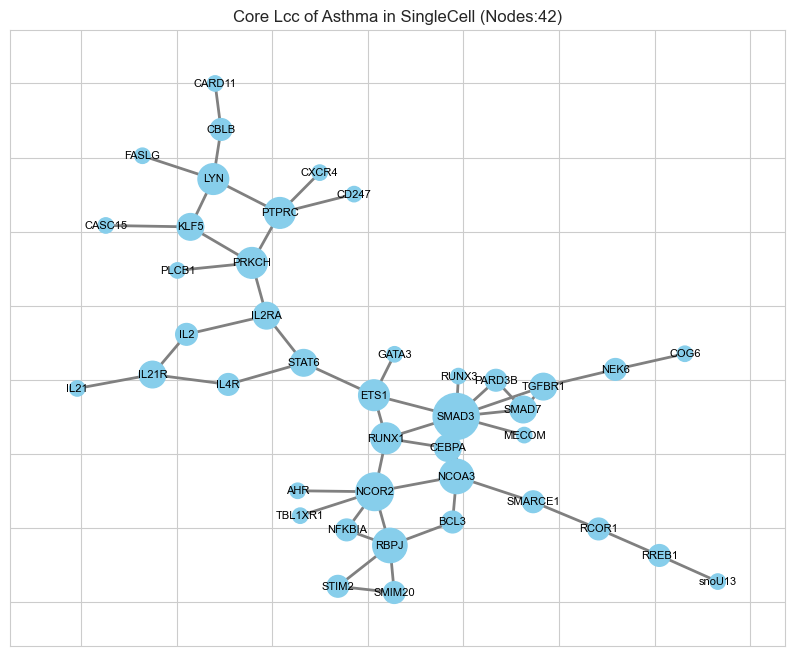

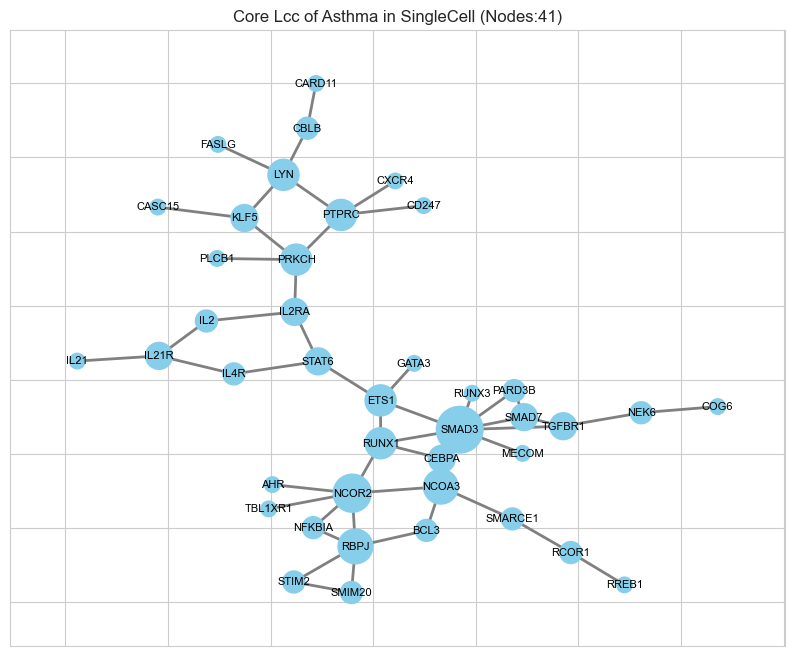

In [11]:
## 可视化最大连通分支,节点大小表示度中心性
def viewNx(g,flag):
    '''

    :param g: 子图
    :param flag: 核心还是外围
    :return: 可视化结果
    '''

    # 计算每个节点的度中心性
    degree_centrality = nx.degree_centrality(g)
    # 将度中心性转换为可视化的节点大小，这里我们使用了一个比例因子来放大大小
    node_sizes = [degree_centrality[node] * 5000 for node in g.nodes()]
    # 连通分支（核心）的子图可视化
    options = {
        'node_color': 'skyblue',
        'width': 2,
        'font_size': 8,
        'font_color': 'black',
        # 设置边的属性
        'edge_color' :'grey',
        }
    # 使用Kamada-Kawai布局算法
    pos = nx.kamada_kawai_layout(g)
    plt.figure(figsize=(10, 8))  # 增加图形大小以减少重叠
    # 绘制节点和边
    nx.draw_networkx(
        g,pos,node_size=node_sizes,**options)
    node_num = len(g.nodes)
    plt.title(f"{flag} Lcc of Asthma in SingleCell (Nodes:{node_num})")
    plt.show()

viewNx(g1,"Core")
viewNx(g2,"Core")


节点重要性：如果一个节点的删除导致了连通分支（或连通组件）的显著分裂，那么这个节点可以被视为一个关键节点或割点（articulation point）

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 计算初始最大连通分支的大小
def max_connected_component_size(graph):
    return max(len(c) for c in nx.connected_components(graph))
# 计算节点重要性
def nodeImportance(G):
    '''
    如果一个节点的删除导致了连通分支（或连通组件）的显著分裂，那么这个节点可以被视为一个关键节点或割点（articulation point）
    :param G:
    :return: 节点重要性字典
    '''
    original_max_size = max_connected_component_size(G)
    # 计算节点的重要程度
    node_importance = {}
    for node in list(G.nodes()):
        H = G.copy()
        H.remove_node(node)
        new_max_size = max_connected_component_size(H)
        node_importance[node] = original_max_size - new_max_size
    return node_importance

# 读取asthma gwas数据中所有基因、核心。外围
trait = pd.read_csv(r"E:\0_单细胞1\data\poly_posterior_prior_gene_new\29_new.txt",sep = "\t")
trait_coregene = list(pd.read_csv(r"E:\0_单细胞1\data\gene set\29_coregene.txt",sep = "\t",header= None)[0])
trait_core = trait[trait["gene name"].isin(trait_coregene)]

# 读取TS FACS单细胞数据
annData = sc.read_h5ad(r"E:\00_CeSOP\data\TS_FACS\TS_Liver.h5ad")
sc_gene = list(annData.var.index)

##  连通分支（核心）的子图
l_connected_core,lcc = Lcc(G,trait_coregene)
g1 = nx.subgraph(G,l_connected_core)
## 单细胞数据中的核心基因
sc_asthma_coregene = list(set(sc_gene) & set(l_connected_core))
g2 = nx.subgraph(G,sc_asthma_coregene)
# 网络拓扑上的节点重要性
node_importance = nodeImportance(g2)
# node_importance.to_csv(r"E:\0_单细胞1\results\importance of nodes in network\core_asthma.txt")

# 将节点拓扑重要性归一化
# 提取字典中的值并计算最小值和最大值

values = list(node_importance.values())
min_value = min(values)
max_value = max(values)
# 选择一个小的epsilon，保证归一化值不为0或1
epsilon = 0.0001
# 使用最小-最大归一化公式对字典的值进行归一化
node_importance_norm = {key: ((value - min_value) / (max_value - min_value) * (1 - 2 * epsilon) + epsilon)
                        for key, value in node_importance.items()}
# 按键排序
node_importance_norm_sorted = {key: node_importance_norm[key] for key in sorted(node_importance_norm)}
print("原始数据:", node_importance)
print("归一化后的数据:", node_importance_norm_sorted)

原始数据: {'CXCR4': 1, 'MECOM': 1, 'CARD11': 1, 'CEBPA': 1, 'PRKCH': 11, 'SMAD7': 1, 'KLF5': 2, 'NCOA3': 4, 'ETS1': 19, 'IL2RA': 12, 'CASC15': 1, 'SMAD3': 8, 'RUNX3': 1, 'AHR': 1, 'PARD3B': 1, 'IL21R': 2, 'TGFBR1': 3, 'PLCB1': 1, 'CBLB': 2, 'STAT6': 17, 'FASLG': 1, 'NEK6': 2, 'GATA3': 1, 'CD247': 1, 'RCOR1': 2, 'NFKBIA': 1, 'BCL3': 1, 'IL4R': 1, 'IL21': 1, 'LYN': 4, 'SMARCE1': 3, 'RUNX1': 1, 'NCOR2': 3, 'TBL1XR1': 1, 'RREB1': 1, 'STIM2': 1, 'COG6': 1, 'IL2': 1, 'PTPRC': 3, 'SMIM20': 1, 'RBPJ': 3}
归一化后的数据: {'AHR': 0.0001, 'BCL3': 0.0001, 'CARD11': 0.0001, 'CASC15': 0.0001, 'CBLB': 0.05564444444444445, 'CD247': 0.0001, 'CEBPA': 0.0001, 'COG6': 0.0001, 'CXCR4': 0.0001, 'ETS1': 0.9999, 'FASLG': 0.0001, 'GATA3': 0.0001, 'IL2': 0.0001, 'IL21': 0.0001, 'IL21R': 0.05564444444444445, 'IL2RA': 0.6110888888888889, 'IL4R': 0.0001, 'KLF5': 0.05564444444444445, 'LYN': 0.16673333333333332, 'MECOM': 0.0001, 'NCOA3': 0.16673333333333332, 'NCOR2': 0.11118888888888889, 'NEK6': 0.05564444444444445, 'NFKBIA': 

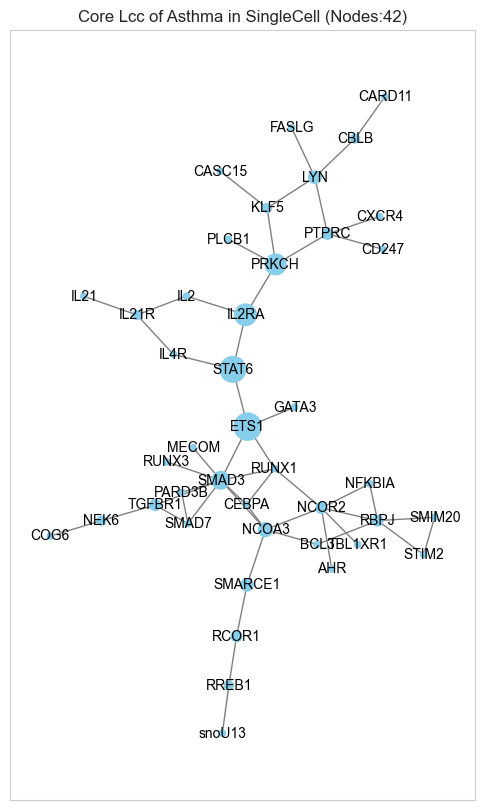

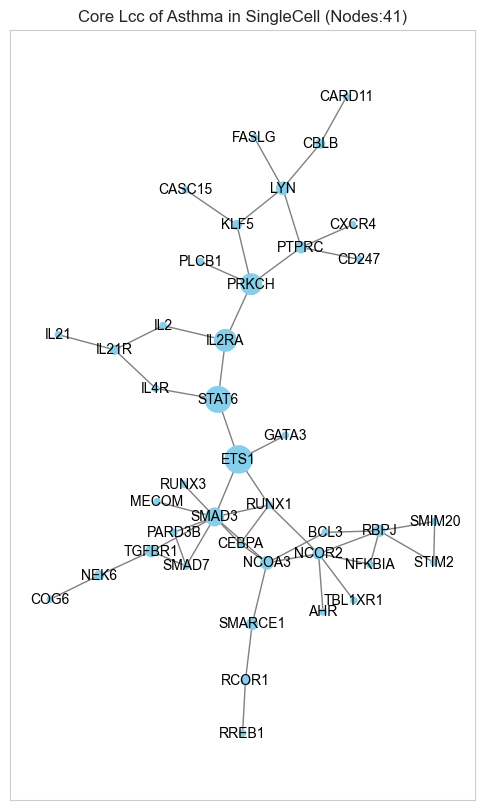

In [20]:
## 可视化最大连通分支,节点大小表示度中心性
def viewNx1(g):
    '''

    :param g: 子图
    :param flag: 核心还是外围
    :return: 可视化结果
    '''

    node_importance = nodeImportance(g)
    # 根据重要程度设置节点大小
    node_sizes = [node_importance[node] * 20 for node in g.nodes()]

    # 连通分支（核心）的子图可视化
    options = {
        'node_color': 'skyblue',
        # 'width': 2,
        'font_size': 10,
        'font_color': 'black',
        # 设置边的属性
        'edge_color' :'grey',
        }
    # 使用Kamada-Kawai布局算法
    pos = nx.kamada_kawai_layout(g)
    plt.figure(figsize=(6, 10))  # 增加图形大小以减少重叠
    # 绘制节点和边
    nx.draw_networkx(
        g,pos,node_size=node_sizes,**options)
    node_num = len(g.nodes)
    plt.title(f"Core Lcc of Asthma in SingleCell (Nodes:{node_num})")
    plt.grid(False)
    plt.show()

viewNx1(g1)
viewNx1(g2)

## 基因在组织的单细胞数据中是否显著高表达

In [117]:
# # 单细胞中所有asthma核心基因的表达
# import os
# alltissue_df = pd.DataFrame()
# c= 0
# tissuelist = os.listdir(r"E:\0_单细胞1\results\lcczscore-pip")
# for tissue in tissuelist:
#     c+=1
#     print(c,tissue)
#     # 读取TS FACS单细胞数据
#     filePath = r"E:\0_单细胞1\data\TS FACS\TS_%s.h5ad"%tissue
#     adata = sc.read_h5ad(filePath)
#     adata_subset = adata[:, adata.var_names.isin(sc_asthma_coregene)].to_df()
#     alltissue_df = pd.concat([alltissue_df,adata_subset])
# 
# alltissue_df.to_csv(r"E:\0_单细胞1\data\core gene of asthma sc data.csv")
# 
# # 核心基因在细胞中表达的分布
# alltissue_df = pd.read_csv(r"E:\0_单细胞1\data\core gene of asthma sc data.csv")
# # 随机选择大约1/10的行，固定随机种子以保持可重复性
# sampled_df = alltissue_df.sample(frac=0.1, random_state=42).iloc[:,1:]
# sampled_df.to_csv(r"E:\0_单细胞1\data\core gene of asthma sc data sample percent10.csv")

In [ ]:
# from scipy.stats import mannwhitneyu

# sampled_df = pd.read_csv(r"E:\0_单细胞1\data\core gene of asthma sc data sample percent10.csv")
# # 核心基因在每个组织中的表达
# tissuelist = os.listdir(r"E:\0_单细胞1\results\lcczscore-pip")
# for tissue in tissuelist[0:3]:
#     # 读取TS FACS单细胞数据
#     filePath = r"E:\0_单细胞1\data\TS FACS\TS_%s.h5ad"%tissue
#     adata = sc.read_h5ad(filePath)
#     adata_subset = adata[:, adata.var_names.isin(sc_asthma_coregene)].to_df()

#     # 存储检验结果
#     results = []
#     # 对每一列执行 Wilcoxon 秩和检验
#     for column in adata_subset.columns:
#         # stat, p = mannwhitneyu(data1, data2, alternative='greater')  # p<0.05,data1 is probably greater than data2
#         stat, p = mannwhitneyu(adata_subset[column], sampled_df[column], alternative='greater')
#         results.append((column, stat, p))

#     # 将结果转换成 DataFrame
#     results_df = pd.DataFrame(results, columns=['Column', 'Statistic', 'P-Value'])
#     results_df.to_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv"%tissue)
#     # 打印结果
#     print(tissue)
#     print(results_df.head())

## 网络上拓扑重要的节点在性状相关组织中也显著表达
* 思路1： 组织中显著高表达基因的拓扑重要性和 xxxxx

In [9]:
# 将节点拓扑重要性归一化
# 提取字典中的值并计算最小值和最大值

values = list(node_importance.values())
min_value = min(values)
max_value = max(values)

# 选择一个小的epsilon，保证归一化值不为0或1
epsilon = 0.0001
# 使用最小-最大归一化公式对字典的值进行归一化
node_importance_norm = {key: ((value - min_value) / (max_value - min_value) * (1 - 2 * epsilon) + epsilon)
                        for key, value in node_importance.items()}
# 按键排序
node_importance_norm_sorted = {key: node_importance_norm[key] for key in sorted(node_importance_norm)}
print("原始数据:", node_importance)
print("归一化后的数据:", node_importance_norm_sorted)

原始数据: {'AHR': 1, 'SMIM20': 1, 'GATA3': 1, 'PRKCH': 11, 'RUNX1': 1, 'IL2': 1, 'STIM2': 1, 'MECOM': 1, 'CARD11': 1, 'LYN': 4, 'RCOR1': 2, 'IL2RA': 12, 'FASLG': 1, 'IL21': 1, 'IL4R': 1, 'SMARCE1': 3, 'SMAD3': 8, 'SMAD7': 1, 'RBPJ': 3, 'KLF5': 2, 'RUNX3': 1, 'PTPRC': 3, 'NEK6': 2, 'TBL1XR1': 1, 'COG6': 1, 'CD247': 1, 'CBLB': 2, 'ETS1': 19, 'PLCB1': 1, 'IL21R': 2, 'TGFBR1': 3, 'STAT6': 17, 'NFKBIA': 1, 'NCOR2': 3, 'CEBPA': 1, 'CXCR4': 1, 'CASC15': 1, 'NCOA3': 4, 'RREB1': 1, 'BCL3': 1, 'PARD3B': 1}
归一化后的数据: {'AHR': 0.0001, 'BCL3': 0.0001, 'CARD11': 0.0001, 'CASC15': 0.0001, 'CBLB': 0.05564444444444445, 'CD247': 0.0001, 'CEBPA': 0.0001, 'COG6': 0.0001, 'CXCR4': 0.0001, 'ETS1': 0.9999, 'FASLG': 0.0001, 'GATA3': 0.0001, 'IL2': 0.0001, 'IL21': 0.0001, 'IL21R': 0.05564444444444445, 'IL2RA': 0.6110888888888889, 'IL4R': 0.0001, 'KLF5': 0.05564444444444445, 'LYN': 0.16673333333333332, 'MECOM': 0.0001, 'NCOA3': 0.16673333333333332, 'NCOR2': 0.11118888888888889, 'NEK6': 0.05564444444444445, 'NFKBIA': 

In [10]:
import os
tissuelist = os.listdir(r"E:\0_单细胞1\results\lcczscore-pip")
for tissue in tissuelist:
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv"%tissue)
    df_sorted = df.sort_values("Column")
    greater_genes = list(df_sorted[df_sorted["P-Value"] <= 0.01]["Column"])
    # 初始化总和
    total_sum = 0

    # 遍历字典，如果键也在列表中，累加它的值
    for key, value in node_importance_norm_sorted.items():
        if key in greater_genes:
            total_sum += value

    # 打印结果
    print(tissue, total_sum)

Bladder 1.3350666666666666
Blood 1.2227777777777777
Bone_Marrow 3.11218888888889
Eye 1.8904111111111108
Fat 3.0017
Heart 1.3346666666666667
Kidney 0.055944444444444456
Large_Intestine 1.778722222222222
Liver 1.390011111111111
Lung 2.112688888888889
Lymph_Node 2.6121888888888893
Mammary 1.7231777777777775
Muscle 1.9455555555555555
Pancreas 0.7789222222222222
Prostate 0.05604444444444445
Salivary_Gland 0.22337777777777773
Skin 3.001300000000001
Small_Intestine 2.4459555555555563
Spleen 3.556544444444445
Thymus 2.778922222222223
Tongue 0.5007
Trachea 2.0573444444444444
Uterus 2.0012
Vasculature 2.6127888888888893


* 节点拓扑重要性和显著高表达pvalue 的相似性（pvalue越小越显著）

In [3]:
import pandas as pd
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="corelcczscore-tissue")
# pvalue小于0.005的细胞类型
results_related = results[results["fisher's pvalue"]<=0.005]
yes_tissue = list(results_related["tissue"])
no_tissue = list(set(results["tissue"]) - set(yes_tissue))

In [20]:
epsilon1 = 1e-10
v2_list = []
tissuelist = os.listdir(r"E:\0_单细胞1\results\lcczscore-pip")
for tissue in tissuelist:
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv"%tissue)
    df_sorted = df.sort_values("Column")   # 根据基因名字排序
    # v2 = list(df_sorted["P-Value"])
    v2 = list(-np.log10(df_sorted["P-Value"] + epsilon1))
    v2_list.append(v2)

In [21]:
# 将节点拓扑重要性归一化
node_importance = pd.read_csv(r"E:\0_单细胞1\results\importance of nodes in network\core_asthma.csv")
# 计算最大最小值
max_value = node_importance["Count"].max()
min_value = node_importance["Count"].min()
# 选择一个小的epsilon，保证归一化值不为0或1
epsilon2 = 0.0001
# 最大最小归一化
node_importance['Count_normalized'] = (node_importance["Count"] - min_value) / (max_value - min_value) * (1 - 2 * epsilon2) + epsilon2
node_importance_norm_sorted = node_importance.sort_values(by = 'Gene')   # 根据基因名字排序
# 节点重要性
x = list(node_importance_norm_sorted['Count_normalized'])
genelist = list(node_importance_norm_sorted['Gene'])

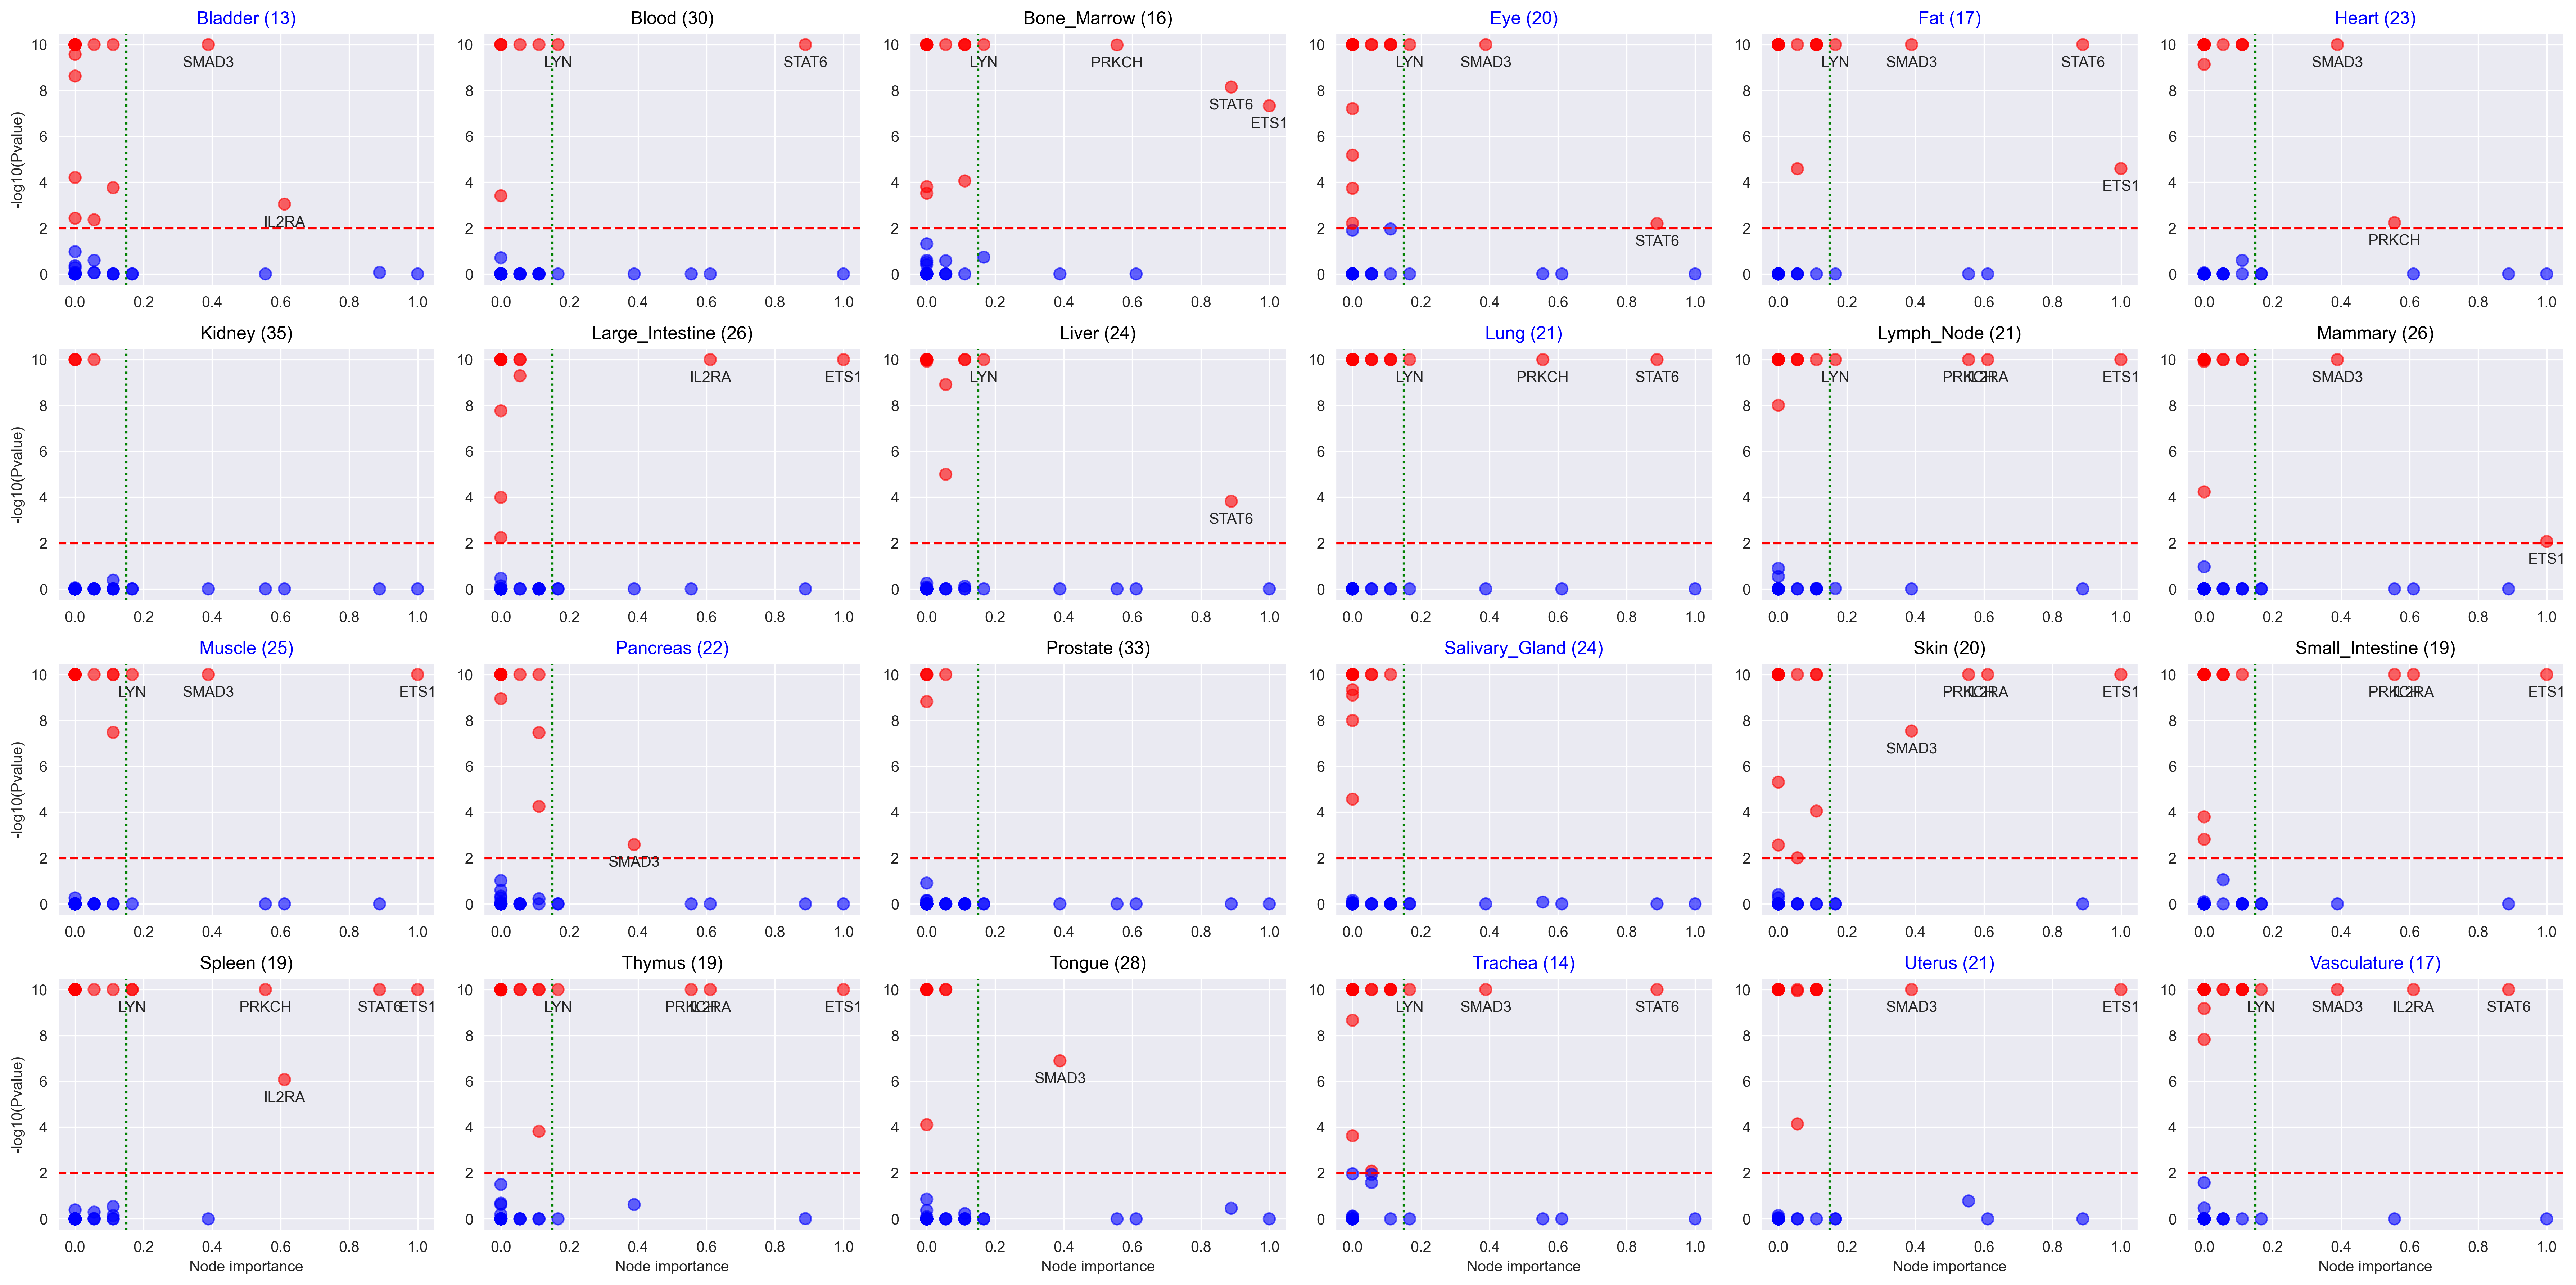

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 设置子图网格的尺寸
rows, cols = 4, 6
# 创建一个4x6的子图网格和一个包含所有子图轴对象的数组
fig, axes = plt.subplots(rows, cols, figsize=(24, 12),dpi = 300)
# 遍历每个轴（子图）并绘制散点图
for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        # 生成一些随机数据

        y = v2_list[index]
        t = tissuelist[index]
        # 根据y值设置颜色
        colors = ['red' if value >= -np.log10(0.01 + epsilon1) else 'blue' for value in y]
        n = len([num for num in y if num < 0.01])

        # 在子图上绘制散点图
        axes[i, j].scatter(x, y,s = 60,c = colors,alpha=0.6, marker='o')
        # 添加横线和纵线
        axes[i, j].axhline(y=-np.log10(0.01 + epsilon1), color='r', linestyle='--')  # 添加一条水平线，y=5
        axes[i, j].axvline(x=0.15, color='g', linestyle=':')   # 添加一条垂直线，x=2
        
        # 检查每个点是否满足条件，并为满足条件的点添加标签
        for xi, yi in zip(x, y):
            if xi > 0.15 and yi >= -np.log10(0.01 + epsilon1):  #至少导致最大连通分支-4 , pvalue < 0.01
                gene = genelist[x.index(xi)]
                axes[i, j].annotate(f'{gene}', (xi, yi), textcoords="offset points", xytext=(0,-15), ha='center')


        # 为每个子图添加标题        
        if t in(yes_tissue):
            axes[i, j].set_title(f'{t} ({n})', color='blue')
        else:
            axes[i, j].set_title(f'{t} ({n})', color='black')
            
for i in range(rows):
    for j in range(cols):
        ax = axes[i, j]
        if i == rows - 1:  # 最下面的行
            ax.set_xlabel('Node importance')
        if j == 0:  # 最左边的列
            ax.set_ylabel('-log10(Pvalue)')
            
# 自动调整子图间的间距
plt.tight_layout()
plt.savefig("temp.jpg")
# 显示图形
plt.show()


In [45]:
x = list(node_importance_norm_sorted['Count_normalized'])
genelist = list(node_importance_norm_sorted['Gene'])
tissue_gene = []
for index in range(24):
    y = v2_list[index]
    t = tissuelist[index]
    # 检查每个点是否满足条件，并为满足条件的点添加标签
    for xi, yi in zip(x, y):
        if xi > 0.15 and yi >= -np.log10(0.01 + epsilon1): 
            tissue_gene.append([t,genelist[x.index(xi)]])
            # print(t,'\t',genelist[x.index(xi)])
tissue_gene_df = pd.DataFrame(tissue_gene)
tissue_gene_df.columns = ["tissue","gene"]
tissue_gene_df["flag"] = tissue_gene_df["tissue"].isin(yes_tissue)
tissue_gene_df.groupby(["flag","gene"]).count()

tissue
flag  gene         
False ETS1        8
      IL2RA       6
      LYN         7
      PRKCH       6
      SMAD3       3
      STAT6       4
True  ETS1        3
      IL2RA       2
      LYN         6
      PRKCH       2
      SMAD3       9
      STAT6       5

In [46]:
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="perilcczscore-tissue")
# pvalue小于0.005的细胞类型
results_related = results[results["fisher's pvalue"]<=0.005]
yes_tissue = list(results_related["tissue"])
no_tissue = list(set(results["tissue"]) - set(yes_tissue))

# 将节点拓扑重要性归一化
node_importance = pd.read_csv(r"E:\0_单细胞1\results\importance of nodes in network\peri_asthma.csv")
# 计算最大最小值
max_value = node_importance["Count"].max()
min_value = node_importance["Count"].min()
# 选择一个小的epsilon，保证归一化值不为0或1
epsilon2 = 0.0001
# 最大最小归一化
node_importance['Count_normalized'] = (node_importance["Count"] - min_value) / (max_value - min_value) * (1 - 2 * epsilon2) + epsilon2
node_importance_norm_sorted = node_importance.sort_values(by = 'Gene')   # 根据基因名字排序
# 节点重要性
x = list(node_importance_norm_sorted['Count_normalized'])
genelist = list(node_importance_norm_sorted['Gene'])

epsilon1 = 1e-10
v2_list = []
tissuelist = os.listdir(r"E:\0_单细胞1\results\lcczscore-pip")
for tissue in tissuelist:
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\peri\%s.csv"%tissue)
    df_sorted = df.sort_values("Column")   # 根据基因名字排序
    # v2 = list(df_sorted["P-Value"])
    v2 = list(-np.log10(df_sorted["P-Value"] + epsilon1))
    v2_list.append(v2)
    


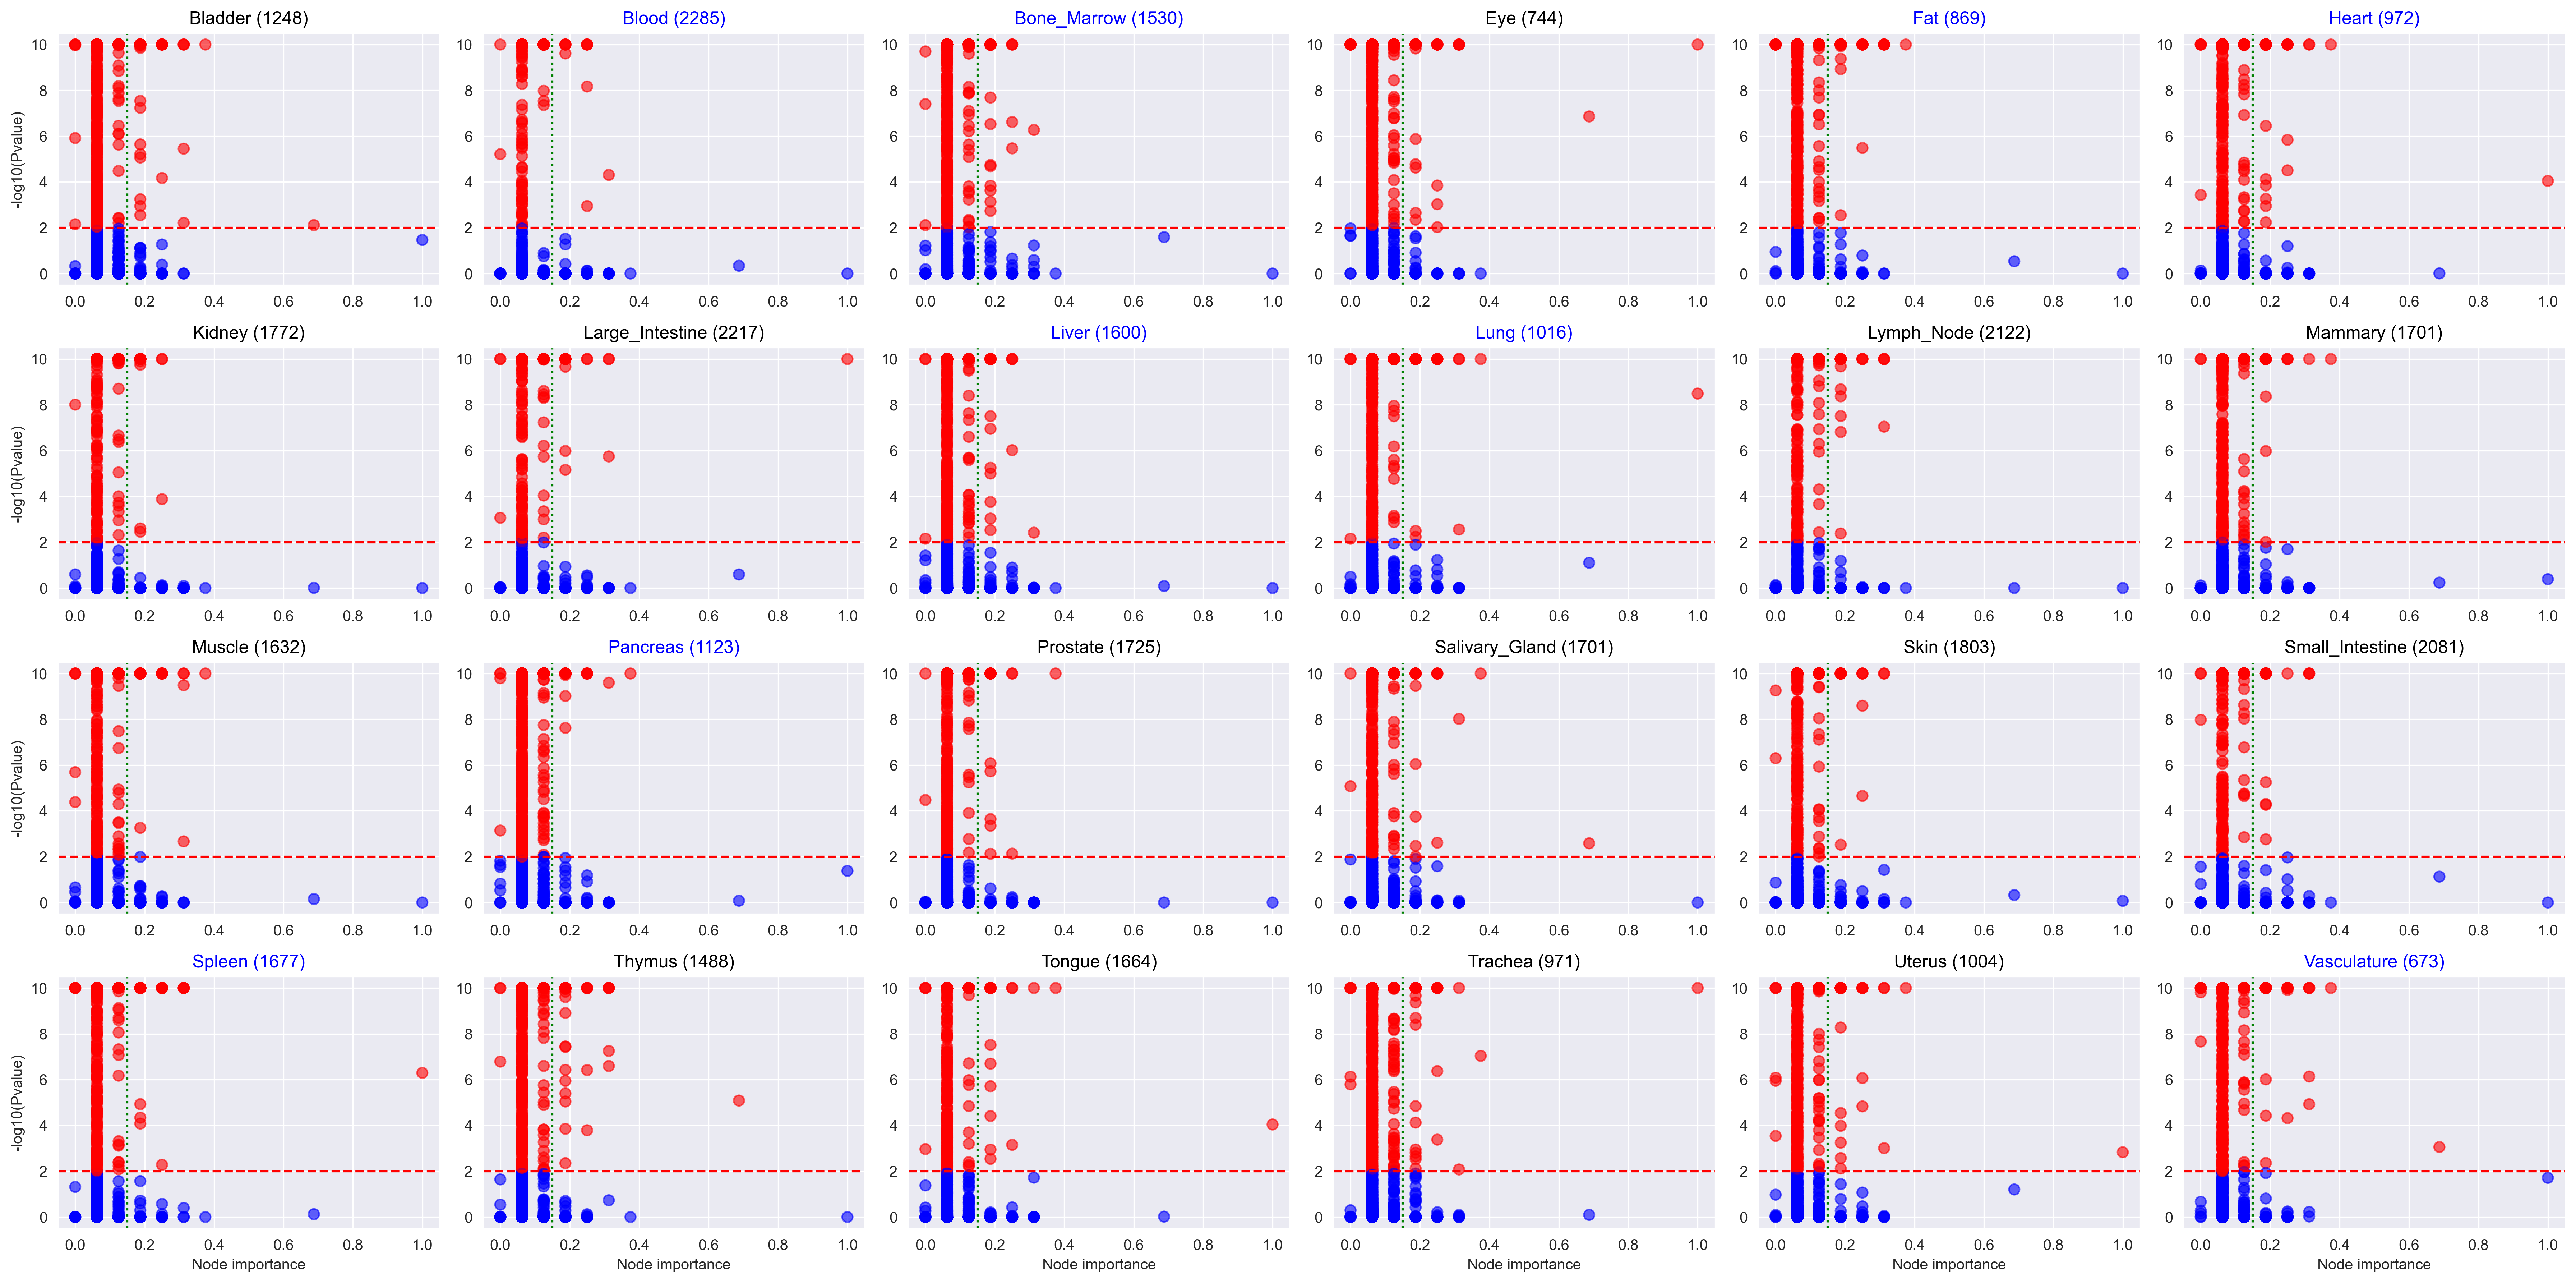

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# 设置子图网格的尺寸
# rows, cols = 2, 3
rows, cols = 4, 6
# 创建一个4x6的子图网格和一个包含所有子图轴对象的数组
fig, axes = plt.subplots(rows, cols, figsize=(24, 12),dpi = 300)
# 遍历每个轴（子图）并绘制散点图
for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        # 生成一些随机数据

        y = v2_list[index]
        t = tissuelist[index]
        # 根据y值设置颜色
        colors = ['red' if value >= -np.log10(0.01 + epsilon1) else 'blue' for value in y]
        n = len([num for num in y if num < 0.01])

        # 在子图上绘制散点图
        axes[i, j].scatter(x, y,s = 50,c = colors,alpha=0.6, marker='o')
        # 添加横线和纵线
        axes[i, j].axhline(y=-np.log10(0.01 + epsilon1), color='r', linestyle='--')  # 添加一条水平线，y=5
        axes[i, j].axvline(x=0.15, color='g', linestyle=':')   # 添加一条垂直线，x=2
        
        # 检查每个点是否满足条件，并为满足条件的点添加标签
        # for xi, yi in zip(x, y):
        #     if xi > 0.15 and yi >= -np.log10(0.01 + epsilon1):  #至少导致最大连通分支-4 , pvalue < 0.01
        #         gene = genelist[x.index(xi)]
        #         axes[i, j].annotate(f'{gene}', (xi, yi), textcoords="offset points", xytext=(0,-15), ha='center')


        # 为每个子图添加标题        
        if t in(yes_tissue):
            axes[i, j].set_title(f'{t} ({n})', color='blue')
        else:
            axes[i, j].set_title(f'{t} ({n})', color='black')
            
for i in range(rows):
    for j in range(cols):
        ax = axes[i, j]
        if i == rows - 1:  # 最下面的行
            ax.set_xlabel('Node importance')
        if j == 0:  # 最左边的列
            ax.set_ylabel('-log10(Pvalue)')
            
# 自动调整子图间的间距
plt.tight_layout()
plt.savefig("temp.jpg")
# 显示图形
plt.show()


In [100]:
x = list(node_importance_norm_sorted['Count_normalized'])
genelist = list(node_importance_norm_sorted['Gene'])
tissue_gene = []
for index in range(24):
    y = v2_list[index]
    t = tissuelist[index]
    # 检查每个点是否满足条件，并为满足条件的点添加标签
    for i in range(len(genelist)):
        if x[i] > 0.15 and y[i] >= -np.log10(0.01 + epsilon1): 
            tissue_gene.append([t,genelist[i]])
            # print(t,'\t',genelist[i],x[i],y[i])
tissue_gene_df = pd.DataFrame(tissue_gene)
tissue_gene_df.columns = ["tissue","gene"]
tissue_gene_df["flag"] = tissue_gene_df["tissue"].isin(yes_tissue)
tissue_gene_df.groupby(["flag","gene"]).count()

tissue
flag  gene              
False ABL2             7
      AC027763.2       2
      AFAP1-AS1        4
      ASAP2            8
      ATF7IP           4
...                  ...
True  WASF1            4
      YTHDC1           2
      ZNF316           7
      ZNF395           4
      ZNF654           6

[166 rows x 1 columns]

In [101]:
result_df = tissue_gene_df.groupby(["flag","gene"]).count()
result_df.to_csv("temp.csv")

In [102]:
result_df = pd.read_csv("temp.csv")
result_df[(result_df["flag"]==True) & (result_df["tissue"]>=5)]


flag      gene  tissue
84   True      ABL2       6
91   True   CCDC85B       5
98   True      CRAT       5
102  True    ENGASE       6
104  True    FAM20B       5
107  True     FOXO3       5
110  True      HLCS       5
112  True       HTT       7
120  True     LAMA5       5
121  True    LGALS8       5
123  True    MAP3K3       5
127  True     MRVI1       5
128  True     MSTO1       6
131  True     NEDD1       6
134  True      NRP1       6
136  True     P4HA2       5
137  True      PAK1       5
139  True     PRKCA       5
142  True      RAF1       8
143  True    RANBP2       6
149  True    TBC1D4       5
150  True      TBCD       6
153  True  TNFRSF14       6
154  True  TNFRSF1A       7
157  True    UBXN11       7
159  True      UTP6       5
163  True    ZNF316       7
165  True    ZNF654       6

In [103]:
false_genelist = list(result_df[(result_df["flag"]==False) & (result_df["tissue"]>=5)]["gene"])
true_genelist = list(result_df[(result_df["flag"]==True) & (result_df["tissue"]>=5)]["gene"])
results_genelist = set(true_genelist) - set(false_genelist)


In [104]:
result_df[(result_df["flag"]==True) & (result_df["gene"].isin(results_genelist))].sort_values("tissue",ascending=False)

flag      gene  tissue
142  True      RAF1       8
112  True       HTT       7
157  True    UBXN11       7
163  True    ZNF316       7
102  True    ENGASE       6
131  True     NEDD1       6
143  True    RANBP2       6
153  True  TNFRSF14       6
91   True   CCDC85B       5
123  True    MAP3K3       5
127  True     MRVI1       5
159  True      UTP6       5

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


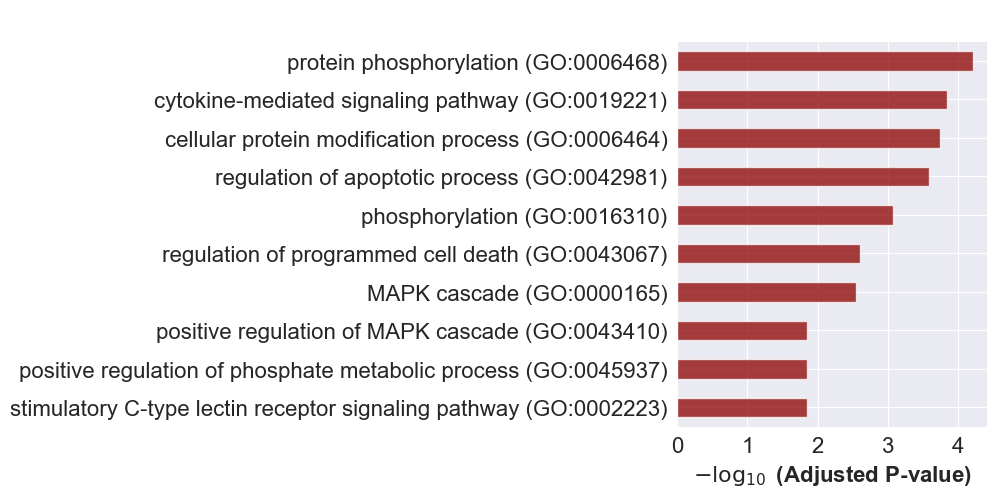

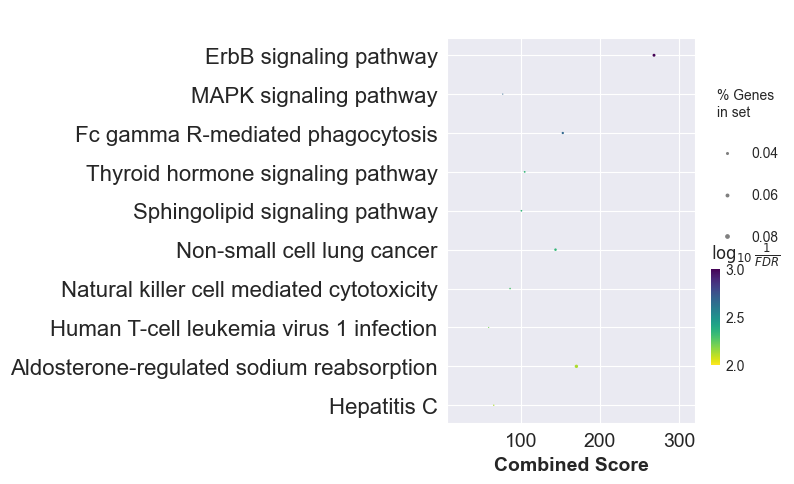

In [110]:
import gseapy as gp
import pandas as pd


# 读取基因列表
# gene_list = pd.read_table(r"E:\0_复杂性状细胞类型特异性\result\test\asthma\celltypes genesets.txt", header=None)[0].tolist()
genelist = list(result_df[(result_df["flag"]==True)]["gene"])
# GO富集分析，pdf结果会自动保存到GO_BP_enrichr下
result_go = gp.enrichr(gene_list=genelist, 
                        organism='human', 
                        gene_sets='GO_Biological_Process_2018', 
                        # description='test', 
                        outdir=r"GO_BP_enrichr")

# KEGG富集分析，pdf结果会自动保存到 KEGG_enrichr 目录下
result_kegg = gp.enrichr(gene_list=genelist, 
                          organism='human', 
                          gene_sets='KEGG_2021_Human', 
                        #   description='test', 
                          outdir=r"KEGG_enrichr")

## 富集结果查看
# 获取富集分析结果
result_go.res2d

## 画图

from gseapy import barplot, dotplot
ax = barplot(result_go.res2d,title=' ', figsize=(4, 5), color='darkred')
plt.show()
ax1 = dotplot(result_kegg.res2d,title=' ', figsize=(4, 5), color='darkred')
plt.show()


In [99]:
node_importance_norm_sorted

Unnamed: 0     Gene  Count  Count_normalized
2773        2773      A2M      2          0.125075
2633        2633    A2ML1      1          0.062588
1449        1449    AAGAB      1          0.062588
1482        1482     AASS      1          0.062588
673          673     AATF      1          0.062588
...          ...      ...    ...               ...
2073        2073    ZNF76      1          0.062588
1101        1101    ZPBP2      1          0.062588
1496        1496    ZPLD1      0          0.000100
403          403  ZSCAN5A      1          0.062588
2745        2745    ZWINT      1          0.062588

[2847 rows x 4 columns]